In [1]:
import pandas as pd

# Load the NEW dataset
# Make sure the path is correct for your project structure
file_path = '../datasets/spreadspoke_scores.csv'
df_nfl = pd.read_csv(file_path)

In [2]:
# --- Initial Inspection --- #

# --- 1. Look at the first few rows to understand the columns --- #
print("--- First 5 Rows of NFL Data ---")
print(df_nfl.head())

--- First 5 Rows of NFL Data ---
  schedule_date  schedule_season schedule_week  schedule_playoff  \
0      9/2/1966             1966             1             False   
1      9/3/1966             1966             1             False   
2      9/4/1966             1966             1             False   
3      9/9/1966             1966             2             False   
4     9/10/1966             1966             1             False   

            team_home  score_home  score_away        team_away  \
0      Miami Dolphins          14          23  Oakland Raiders   
1      Houston Oilers          45           7   Denver Broncos   
2  San Diego Chargers          27           7    Buffalo Bills   
3      Miami Dolphins          14          19    New York Jets   
4   Green Bay Packers          24           3  Baltimore Colts   

  team_favorite_id  spread_favorite over_under_line         stadium  \
0              NaN              NaN             NaN     Orange Bowl   
1              NaN 

In [3]:
# --- 2. Get a technical summary (row count, column names, and check for missing values) --- #
print("\n--- Data Info ---")
df_nfl.info()


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14086 entries, 0 to 14085
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        14086 non-null  object 
 1   schedule_season      14086 non-null  int64  
 2   schedule_week        14086 non-null  object 
 3   schedule_playoff     14086 non-null  bool   
 4   team_home            14086 non-null  object 
 5   score_home           14086 non-null  int64  
 6   score_away           14086 non-null  int64  
 7   team_away            14086 non-null  object 
 8   team_favorite_id     11607 non-null  object 
 9   spread_favorite      11607 non-null  float64
 10  over_under_line      11597 non-null  object 
 11  stadium              14086 non-null  object 
 12  stadium_neutral      14086 non-null  bool   
 13  weather_temperature  12550 non-null  float64
 14  weather_wind_mph     12534 non-null  float64
 15  weather_humidity 

In [4]:
# --- 3. Get a statistical summary of the numerical columns --- #
print("\n--- Statistical Summary ---")
print(df_nfl.describe())


--- Statistical Summary ---
       schedule_season    score_home    score_away  spread_favorite  \
count     14086.000000  14086.000000  14086.000000     11607.000000   
mean       1997.192390     22.513702     19.839699        -5.360644   
std          16.711931     10.519009     10.141589         3.429628   
min        1966.000000      0.000000      0.000000       -26.500000   
25%        1983.000000     15.000000     13.000000        -7.000000   
50%        1998.000000     22.000000     20.000000        -4.500000   
75%        2012.000000     30.000000     27.000000        -3.000000   
max        2024.000000     72.000000     62.000000         0.000000   

       weather_temperature  weather_wind_mph  weather_humidity  
count         12550.000000      12534.000000       8498.000000  
mean             59.004064          7.561353         67.172276  
std              15.536135          5.729357         15.831903  
min              -6.000000          0.000000          0.000000  
25%   

In [5]:
# --- Data Cleaning and Feature Engineering --- #

# Work on a copy to keep the original DataFrame safe
df_clean = df_nfl.copy()

In [6]:
# --- 1. Create the Target Variable ('result') --- #
# We define a simple rule: 1 if the home team won, 0 otherwise (away win or draw).
df_clean['result'] = (df_clean['score_home'] > df_clean['score_away']).astype(int)


In [7]:
# --- 2. Handle Missing Data by Dropping Unreliable Columns --- #
# These columns have too many missing values to be useful for a first model.
columns_to_drop = [
    'team_favorite_id',
    'spread_favorite',
    'over_under_line',
    'weather_humidity',
    'weather_detail'
]
df_clean = df_clean.drop(columns=columns_to_drop)

In [8]:
# --- 3. Drop any remaining rows with missing data for simplicity ---
# After dropping the worst columns, we can remove any leftover rows that still have nulls.
df_clean = df_clean.dropna()

In [9]:
# --- Verify the changes ---
print("--- Cleaned Data Info ---")
# The 'Non-Null Count' for all columns should now be the same.
df_clean.info()



--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 12533 entries, 0 to 14085
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        12533 non-null  object 
 1   schedule_season      12533 non-null  int64  
 2   schedule_week        12533 non-null  object 
 3   schedule_playoff     12533 non-null  bool   
 4   team_home            12533 non-null  object 
 5   score_home           12533 non-null  int64  
 6   score_away           12533 non-null  int64  
 7   team_away            12533 non-null  object 
 8   stadium              12533 non-null  object 
 9   stadium_neutral      12533 non-null  bool   
 10  weather_temperature  12533 non-null  float64
 11  weather_wind_mph     12533 non-null  float64
 12  result               12533 non-null  int64  
dtypes: bool(2), float64(2), int64(4), object(5)
memory usage: 1.2+ MB


In [10]:
print("\n--- First 5 Rows of Cleaned Data ---")
# You should see your new 'result' column at the end.
print(df_clean.head())


--- First 5 Rows of Cleaned Data ---
  schedule_date  schedule_season schedule_week  schedule_playoff  \
0      9/2/1966             1966             1             False   
1      9/3/1966             1966             1             False   
2      9/4/1966             1966             1             False   
3      9/9/1966             1966             2             False   
4     9/10/1966             1966             1             False   

            team_home  score_home  score_away        team_away  \
0      Miami Dolphins          14          23  Oakland Raiders   
1      Houston Oilers          45           7   Denver Broncos   
2  San Diego Chargers          27           7    Buffalo Bills   
3      Miami Dolphins          14          19    New York Jets   
4   Green Bay Packers          24           3  Baltimore Colts   

          stadium  stadium_neutral  weather_temperature  weather_wind_mph  \
0     Orange Bowl            False                 83.0               6.0   
1 

/var/folders/zb/9r9_90xd6q58vdc12982fnp00000gn/T/ipykernel_2004/3561093550.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/var/folders/zb/9r9_90xd6q58vdc12982fnp00000gn/T/ipykernel_2004/3561093550.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Away Win / Draw (0)', 'Home Win (1)'])


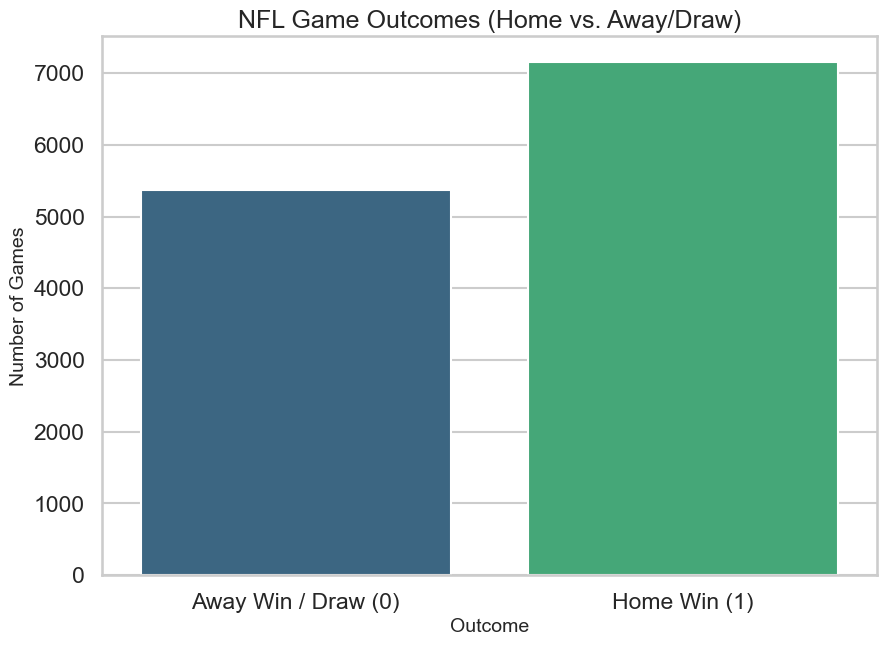

Home teams win 57.11% of the time in this dataset.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional theme for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create the figure for the plot
plt.figure(figsize=(10, 7))

# Generate the count plot for our 'result' column
ax = sns.countplot(
    x='result',
    data=df_clean,
    palette='viridis'
)

# Add clear titles and labels
ax.set_title('NFL Game Outcomes (Home vs. Away/Draw)', fontsize=18)
ax.set_xlabel('Outcome', fontsize=14)
ax.set_ylabel('Number of Games', fontsize=14)

# Make the labels on the x-axis more descriptive
ax.set_xticklabels(['Away Win / Draw (0)', 'Home Win (1)'])

# Display the plot
plt.show()

# Optional: To get the exact percentage for your article
home_win_percentage = df_clean['result'].value_counts(normalize=True)[1] * 100
print(f"Home teams win {home_win_percentage:.2f}% of the time in this dataset.")

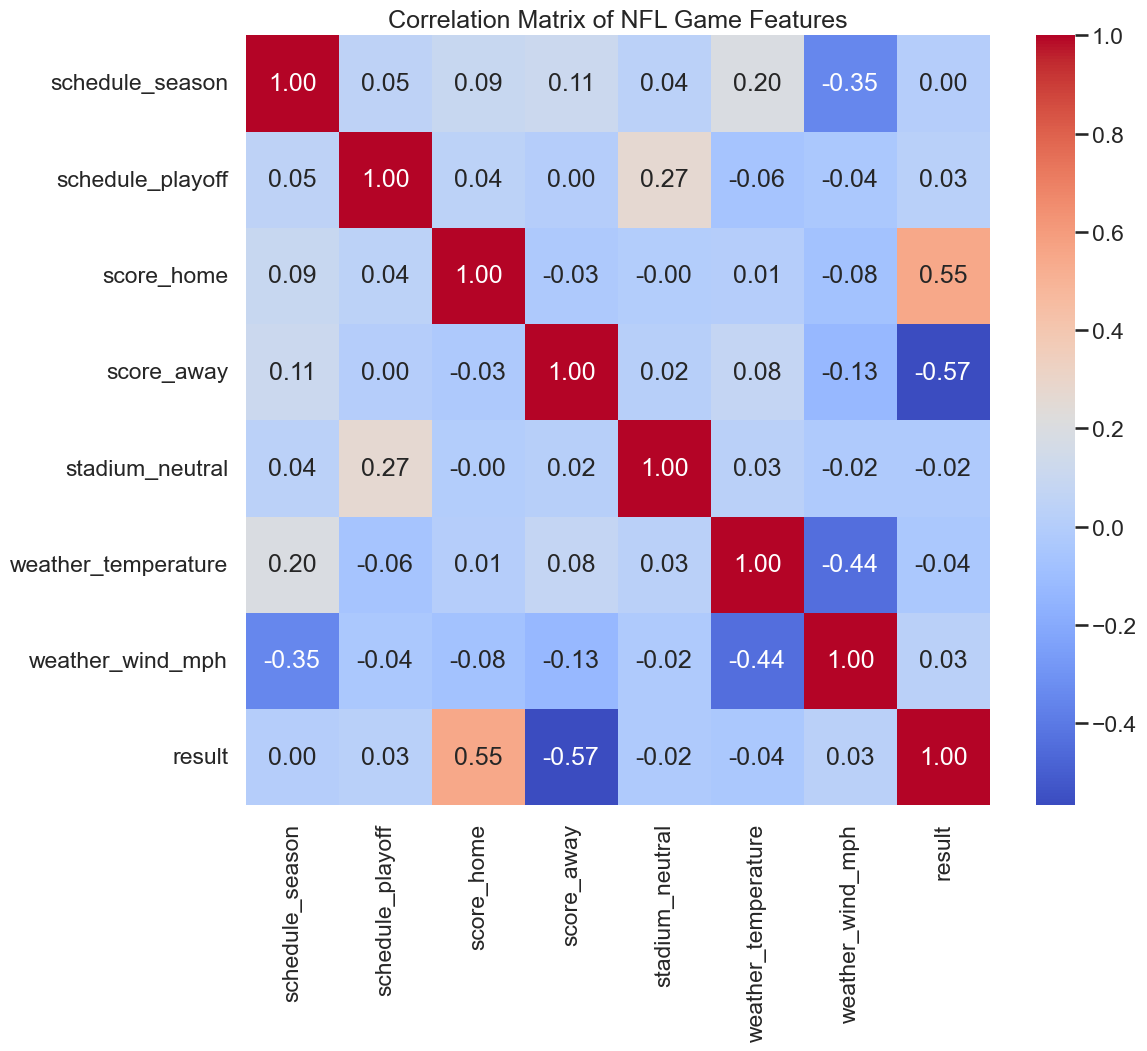

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional theme for the plot
sns.set_theme(style="whitegrid", context="talk")

# Create the figure for the plot
plt.figure(figsize=(12, 10))

# Calculate the correlation matrix for all numerical columns
# numeric_only=True is important to ignore text columns like team names
correlation_matrix = df_clean.corr(numeric_only=True)

# Generate the heatmap
# annot=True will write the correlation numbers on the squares
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm', # A good color map for correlations (red=positive, blue=negative)
    fmt='.2f' # Format the numbers to two decimal places
)

# Add a title
plt.title('Correlation Matrix of NFL Game Features', fontsize=18)

# Display the plot
plt.show()

In [13]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [14]:
# Assume 'df_clean' is your prepared DataFrame from the EDA.
# If you are starting in a new notebook, you would load and clean it first.

# --- Step 1: Define Features (X) and Target (y) ---
# The target is the 'result' column we engineered.
y = df_clean['result']

# The features are all other columns, EXCEPT for ones that would "leak" the answer.
# We must drop the scores, as they are used to calculate the result.
# We also drop non-predictive columns like date and stadium for this simple model.
features_to_drop = ['result', 'score_home', 'score_away', 'schedule_date', 'stadium']
X = df_clean.drop(columns=features_to_drop)


In [15]:
# --- Step 2: Convert Text Columns to Numbers (One-Hot Encoding) ---
# This will handle the team names and the schedule_week, which is also text.
print("Preparing data... (This may take a moment)")
X_encoded = pd.get_dummies(X)


Preparing data... (This may take a moment)


In [16]:
# --- Step 3: Split the Data into Training and Testing Sets ---
# We use an 80/20 split. random_state ensures we get the same split every time.
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



In [17]:
# --- Step 4: Scale the Numerical Features --- #
# This is a new, crucial step to prevent the math warnings.
scaler = StandardScaler()

# We fit the scaler ONLY on the training data to learn the scale.
scaler.fit(X_train)

# Then we transform both the training and testing data.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# --- Step 5: Evaluate the Model's Performance ---
# We make predictions on the test data that the model has never seen before.
predictions = model.predict(X_test)

# We calculate the accuracy by comparing the predictions to the real outcomes.
accuracy = accuracy_score(y_test, predictions)

print("\n--- Model Evaluation ---")
print(f"Our model's accuracy is: {accuracy * 100:.2f}%")
print(f"Baseline to beat (Home-Field Advantage): 57.00%")

if accuracy * 100 > 57:
    print("\nSuccess! Our model is better than the baseline.")
else:
    print("\nOur model did not outperform the baseline.")


NameError: name 'model' is not defined

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [ ]:
df_clean['schedule_date'] = pd.to_datetime(df_clean['schedule_date'])
df_clean = df_clean.sort_values(by='schedule_date').reset_index(drop=True)

In [ ]:
def calculate_team_form(df, window_size=5):
    """
    Calculates dynamic features like win streaks and recent performance for each team.

    Args:
        df (pd.DataFrame): The DataFrame of game data, sorted by date.
        window_size (int): The number of recent games to look back on for averages.

    Returns:
        pd.DataFrame: The original DataFrame with new dynamic feature columns added.
    """

    # Use defaultdict to easily handle teams the first time we see them
    team_stats = defaultdict(lambda: {'streak': 0, 'recent_scores_for': [], 'recent_scores_against': []})

    # Lists to store our new features for each game
    home_streaks = []
    away_streaks = []
    home_avg_pts_for = []
    home_avg_pts_against = []
    away_avg_pts_for = []
    away_avg_pts_against = []

    print("Calculating dynamic features for each game... (This will take a moment)")

    # Loop through every single game in our dataset chronologically
    for index, row in df.iterrows():
        home_team = row['team_home']
        away_team = row['team_away']
        score_home = row['score_home']
        score_away = row['score_away']
        home_win = row['result'] == 1

        # --- Get the stats for the home team *before* this game ---
        home_team_data = team_stats[home_team]
        home_streaks.append(home_team_data['streak'])
        home_avg_pts_for.append(np.mean(home_team_data['recent_scores_for']) if home_team_data['recent_scores_for'] else 0)
        home_avg_pts_against.append(np.mean(home_team_data['recent_scores_against']) if home_team_data['recent_scores_against'] else 0)

        # --- Get the stats for the away team *before* this game ---
        away_team_data = team_stats[away_team]
        away_streaks.append(away_team_data['streak'])
        away_avg_pts_for.append(np.mean(away_team_data['recent_scores_for']) if away_team_data['recent_scores_for'] else 0)
        away_avg_pts_against.append(np.mean(away_team_data['recent_scores_against']) if away_team_data['recent_scores_against'] else 0)

        # --- Now, update the stats *after* the game is over ---
        # Update home team stats
        team_stats[home_team]['recent_scores_for'].append(score_home)
        team_stats[home_team]['recent_scores_against'].append(score_away)
        if home_win:
            team_stats[home_team]['streak'] = max(1, team_stats[home_team]['streak'] + 1)
        else:
            team_stats[home_team]['streak'] = min(-1, team_stats[home_team]['streak'] - 1)

        # Update away team stats
        team_stats[away_team]['recent_scores_for'].append(score_away)
        team_stats[away_team]['recent_scores_against'].append(score_home)
        if not home_win:
            team_stats[away_team]['streak'] = max(1, team_stats[away_team]['streak'] + 1)
        else:
            team_stats[away_team]['streak'] = min(-1, team_stats[away_team]['streak'] - 1)

        # Keep the "recent scores" lists from getting too long
        if len(team_stats[home_team]['recent_scores_for']) > window_size:
            team_stats[home_team]['recent_scores_for'].pop(0)
            team_stats[home_team]['recent_scores_against'].pop(0)
        if len(team_stats[away_team]['recent_scores_for']) > window_size:
            team_stats[away_team]['recent_scores_for'].pop(0)
            team_stats[away_team]['recent_scores_against'].pop(0)

    # Add the new features as columns to the DataFrame
    df['home_streak'] = home_streaks
    df['away_streak'] = away_streaks
    df['home_avg_pts_for'] = home_avg_pts_for
    df['home_avg_pts_against'] = home_avg_pts_against
    df['away_avg_pts_for'] = away_avg_pts_for
    df['away_avg_pts_against'] = away_avg_pts_against

    return df

In [ ]:
# --- Let's run the function ---
# We'll create a new DataFrame with our dynamic features
df_dynamic = calculate_team_form(df_clean.copy())

# Display the first few rows to see our new "smarter clues"
print("\n--- DataFrame with New Dynamic Features ---")
print(df_dynamic[['schedule_date', 'team_home', 'team_away', 'home_streak', 'away_streak', 'home_avg_pts_for', 'result']].tail(10))

